# Task 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('cars_messy.csv')
data.head(5)

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,DoorNum
0,Chevrolet Chevelle Malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,US,NaN
1,Buick Skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,US,NaN
2,Plymouth Satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,US,NaN
3,AMC Rebel SST,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,US,NaN
4,Ford Torino,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,US,NaN


 ## 2.1.1. Remove all the leading and trailing spaces in the data

In [3]:
data.columns = data.columns.str.strip()

 ## 2.1.2 Check if there are duplicates.

In [4]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 1


In [5]:
#drop duplicate rows
data = data.drop_duplicates(keep = False)
remove_duplicates = data.duplicated()
print('Number of duplicate rows = %d' % (remove_duplicates.sum()))

Number of duplicate rows = 0


In [6]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,DoorNum
count,399.000000,401.000000,396.000000,399.000000,398.000000,397.000000,401.0000,3.000000
mean,23.069925,5.473815,193.784091,102.967419,2979.007538,15.552393,75.9202,3.333333
std,8.430436,1.708783,104.094076,39.956779,845.598825,2.785537,3.7608,1.154701
min,0.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.0000,2.000000
25%,17.000000,4.000000,103.250000,75.000000,2223.750000,13.700000,73.0000,3.000000
50%,22.300000,4.000000,151.000000,93.000000,2831.500000,15.500000,76.0000,4.000000
75%,29.000000,8.000000,275.750000,127.000000,3618.250000,17.200000,79.0000,4.000000
max,46.600000,8.000000,455.000000,225.000000,5140.000000,24.800000,82.0000,4.000000


 ## 2.2.1 Display the null/missing values.

In [7]:
print('Number of instances = %d\nNumber of attributes = %d' % (data.shape[0], data.shape[1]))
print('------------------------------')
data.isnull().sum()

Number of instances = 403
Number of attributes = 10
------------------------------


Car               0
MPG               4
Cylinders         2
Displacement      7
Horsepower        4
Weight            5
Acceleration      6
Model             2
Origin            1
DoorNum         400
dtype: int64

 ## 2.2.2 Drop columns with 90+% null values.

In [8]:
if 'DoorNum' in data.columns:
    data = data.drop(['DoorNum'], axis=1)
    
print('Number of attributes = %d' % (data.shape[1]))

Number of attributes = 9


 ## 2.2.3.1 Draw two plots for Horsepower vs Cylinders and Displacement vs Cylinders to explore them with visualization.

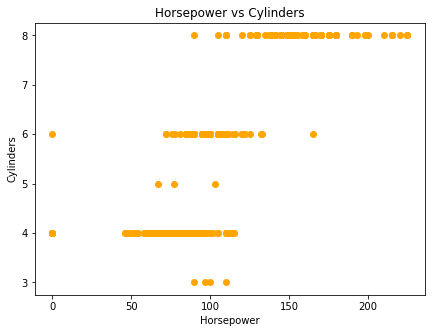

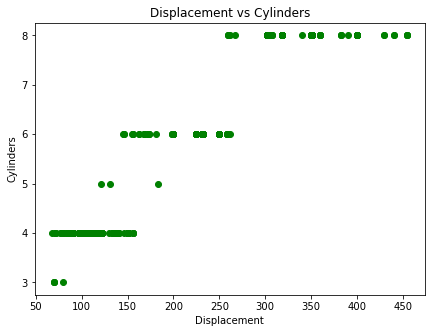

In [9]:
#plot 1
plt.figure(figsize=(7, 5))

plt.scatter(data.Horsepower, data.Cylinders,c='orange', marker='o')
plt.xlabel('Horsepower', fontsize=10)
plt.ylabel('Cylinders', fontsize=10)
plt.title('Horsepower vs Cylinders', fontsize=12)

plt.figure(figsize=(7, 5))

plt.scatter(data.Displacement, data.Cylinders,c='green', marker='o')
plt.xlabel('Displacement', fontsize=10)
plt.ylabel('Cylinders', fontsize=10)
plt.title('Displacement vs Cylinders', fontsize=12)

plt.show()

 ## 2.2.3.2 Plot a grouped bar chart for Displacement, Acceleration, MPG, and Horsepower grouped by Cylinders.

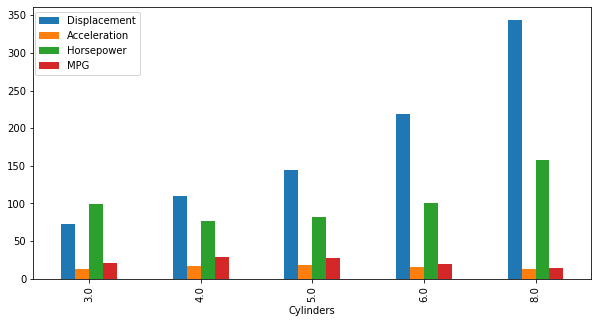

In [10]:
data[['Displacement','Acceleration','Horsepower','MPG', 'Cylinders']].groupby('Cylinders').mean().plot(kind='bar', figsize=(10, 5))
plt.legend(bbox_to_anchor=(0.2, 1))

In [11]:
median = data['Cylinders'].median()
print(median)

4.0


 ## 2.2.3.3 What can you find from above two charts to better impute the different feature missing values? Do you have any solutions for each of them and why? Please briefly explain in the code notebook.



The above graphs show the relationship between the independent variable Cylinders, and the dependent variables Displacement, Acceleration, Horsepower, and MPG. All variables have null values in the data set, with the independent variable Cylinder having the least number of occurrences at 2. A common approach to handle these missing/null values is to replace those occurrences with the median value of the column in question.The median for Cylinders is 4, which is a whole number and it makes sense to replace missing values with this value as the majority of cars do come with 4 cylinders. The null values for the dependent variables are all measurements and therefore can be continous variables using the median of each one of them.

 ## 2.2.4 Impute all the missing values with median 

In [12]:
data = data.fillna(data.median())

 ## 2.3.1 Draw boxplots in one figure to identify the features/columns that contain outliers.

<AxesSubplot:>

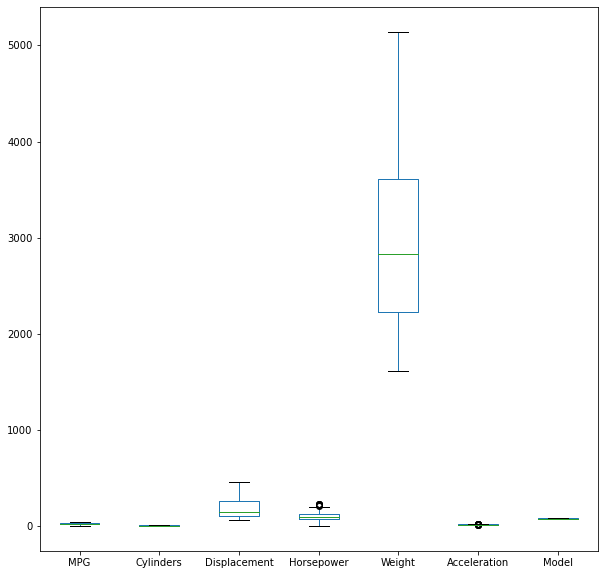

In [13]:
data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']].plot.box(figsize = (10, 10))

 ## 2.3.2 Draw boxplots in one figure only containing outliers.

<AxesSubplot:>

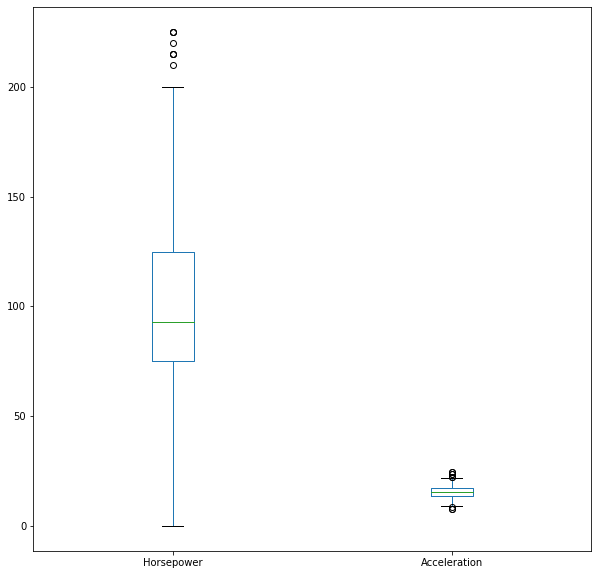

In [14]:
data[['Horsepower', 'Acceleration']].plot.box(figsize = (10, 10))

 ## 2.3.3 Come up with one approach to discard outliers and implement it.


Using IQR method to establish upper and lower bounds

In [15]:
Q1=data['Horsepower'].quantile(0.25)
Q3=data['Horsepower'].quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,upper_bound)

0.0 200.0


In [16]:
data = data.loc[(data['Horsepower'] > lowqe_bound) & (data['Horsepower'] < upper_bound)]
data.shape


(388, 9)

In [17]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,23.232216,5.425258,189.014175,101.819588,2952.449742,15.622165,76.010309
std,8.318860,1.688104,99.090687,34.281076,822.383037,2.701770,3.689485
min,0.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.750000,75.000000,2222.250000,13.975000,73.000000
50%,22.350000,4.000000,151.000000,93.000000,2811.000000,15.500000,76.000000
75%,29.000000,6.500000,258.000000,120.000000,3564.750000,17.200000,79.000000
max,46.600000,8.000000,429.000000,198.000000,5140.000000,24.800000,82.000000


In [18]:
Q1=data['Acceleration'].quantile(0.25)
Q3=data['Acceleration'].quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,upper_bound)

9.1375 22.037499999999998


In [19]:
data = data.loc[(data['Acceleration'] > lowqe_bound) & (data['Acceleration'] < upper_bound)]
data.shape

(379, 9)

In [20]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,23.179683,5.427441,189.518470,102.319261,2957.943272,15.520580,76.010554
std,8.175741,1.683058,99.084385,33.996435,825.913999,2.458211,3.676739
min,0.000000,3.000000,68.000000,46.000000,1613.000000,9.500000,70.000000
25%,17.500000,4.000000,105.000000,76.000000,2224.500000,13.950000,73.000000
50%,22.300000,4.000000,151.000000,93.000000,2815.000000,15.500000,76.000000
75%,29.000000,6.000000,258.000000,120.000000,3572.000000,17.000000,79.000000
max,46.600000,8.000000,429.000000,198.000000,5140.000000,21.900000,82.000000


 ## 2.4.1 Draw multiple histograms for all numerical attributes. What can you find? Please clearly explain in the notebook

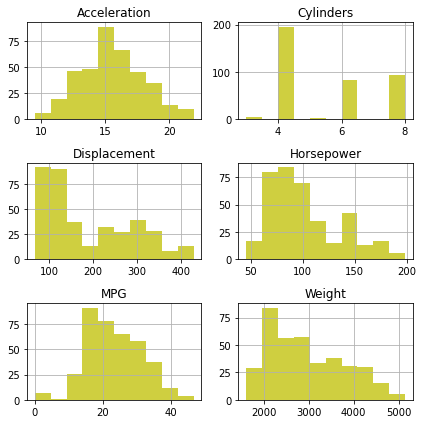

In [21]:
data[['Acceleration', 'Cylinders', 'Displacement', 'Horsepower', 'MPG', 'Weight']].hist(figsize=(6, 6), bins=10, alpha = 0.75, color = 'y')
plt.tight_layout()
plt.show()

In the above graphs we can see how Acceleration is the only variable that follows a clear normal distribution. Horsepower is also somewhat normal but not as clear as Acceleartion. Displacement, MPG, and Weight are somewhat right-skewed and unimodal. Cylinders have a clear mode at 4, and other peaks at 6 and 8.

 ## 2.4.2 Calculate a correlation matrix

In [22]:
df = data[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model']]
df.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
MPG,1.000000,-0.721100,-0.756597,-0.758549,-0.784443,0.368471,0.561080
Cylinders,-0.721100,1.000000,0.946039,0.855416,0.892303,-0.477992,-0.322646
Displacement,-0.756597,0.946039,1.000000,0.885381,0.925184,-0.492791,-0.325435
Horsepower,-0.758549,0.855416,0.885381,1.000000,0.880685,-0.656532,-0.367721
Weight,-0.784443,0.892303,0.925184,0.880685,1.000000,-0.396107,-0.276487
Acceleration,0.368471,-0.477992,-0.492791,-0.656532,-0.396107,1.000000,0.240724
Model,0.561080,-0.322646,-0.325435,-0.367721,-0.276487,0.240724,1.000000


 ## Draw a correlation matrix. What can you find? Please explain in the notebook. 

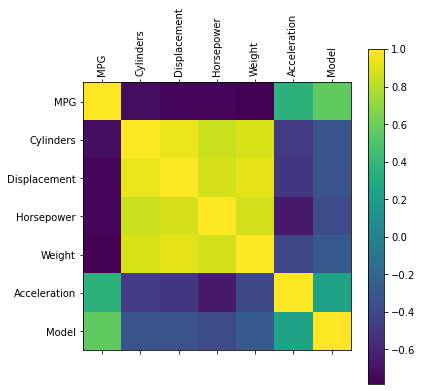

In [23]:
plt.rcParams["figure.figsize"] = (6,6)
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()

plt.show()

From the above correlation matrix we can observe how the strongest positive correlation corresponds to the more yellow color. Taking this in to consideration, we can see that Displacement and Cylinders are very strongly, positively correlated, followed by Displacement and Weight. Weight and Horsepower are also correlated. In contrast, anything purple shows strong, negative correlated variables. MPG has a strong, negative correlation with Cylinders, Displacement, Horsepower and Weight, which makes sense as MPG tends to go down as the vehicle gets heavier. In addition, Horsepower and Acceleration are also strong and negatively correlated. Model and Acceleration are poorly correlated.

## 2.4.3 Draw a scatter matrix. What can you find? Please clearly explain in the notebook


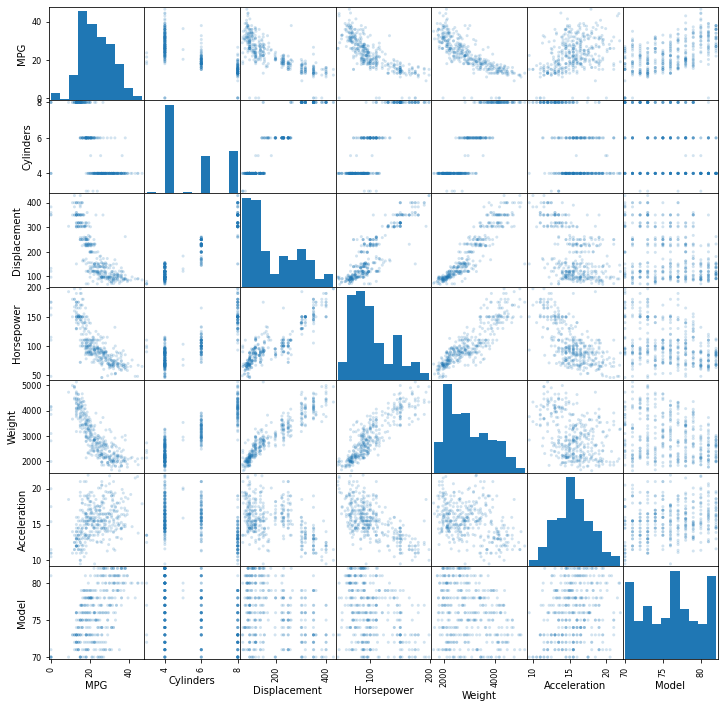

In [24]:
from pandas.plotting import scatter_matrix
axes = scatter_matrix(df, alpha=0.2, figsize = (12, 12))

The scatter matrix shows us in a scatter plot format the correlations found in the correlation matrix. In the first row for MPG, we can see a clear, strong, negative correlation with the majority of the other variables, with the exception of Acceleration and Model. Displacement has a strong, positive correlation with Horsepower and Weight. As also seen in the correlation matrix, the last row, Model, does not show a clear correlation with any variable. 

Code References:
Code samples were obtained from Professor Liao's Notebook "Python Examples for Data Preprocessing & Visualization with Pandas Plotting and Matplotlib" - https://mymasonportal.gmu.edu/bbcswebdav/pid-13192927-dt-content-rid-209550102_1/courses/41143.202140/40405.202140_ImportedContent_20210517110942/Liao_py_preproc_vis.html

IQR Method to remove outliers: https://medium.com/analytics-vidhya/removing-outliers-from-data-using-python-and-pandas-a3b5c6cded2c

In [25]:
data.to_csv("cars_cleaned.csv", index = False)